# Convergence Tests

In [2]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

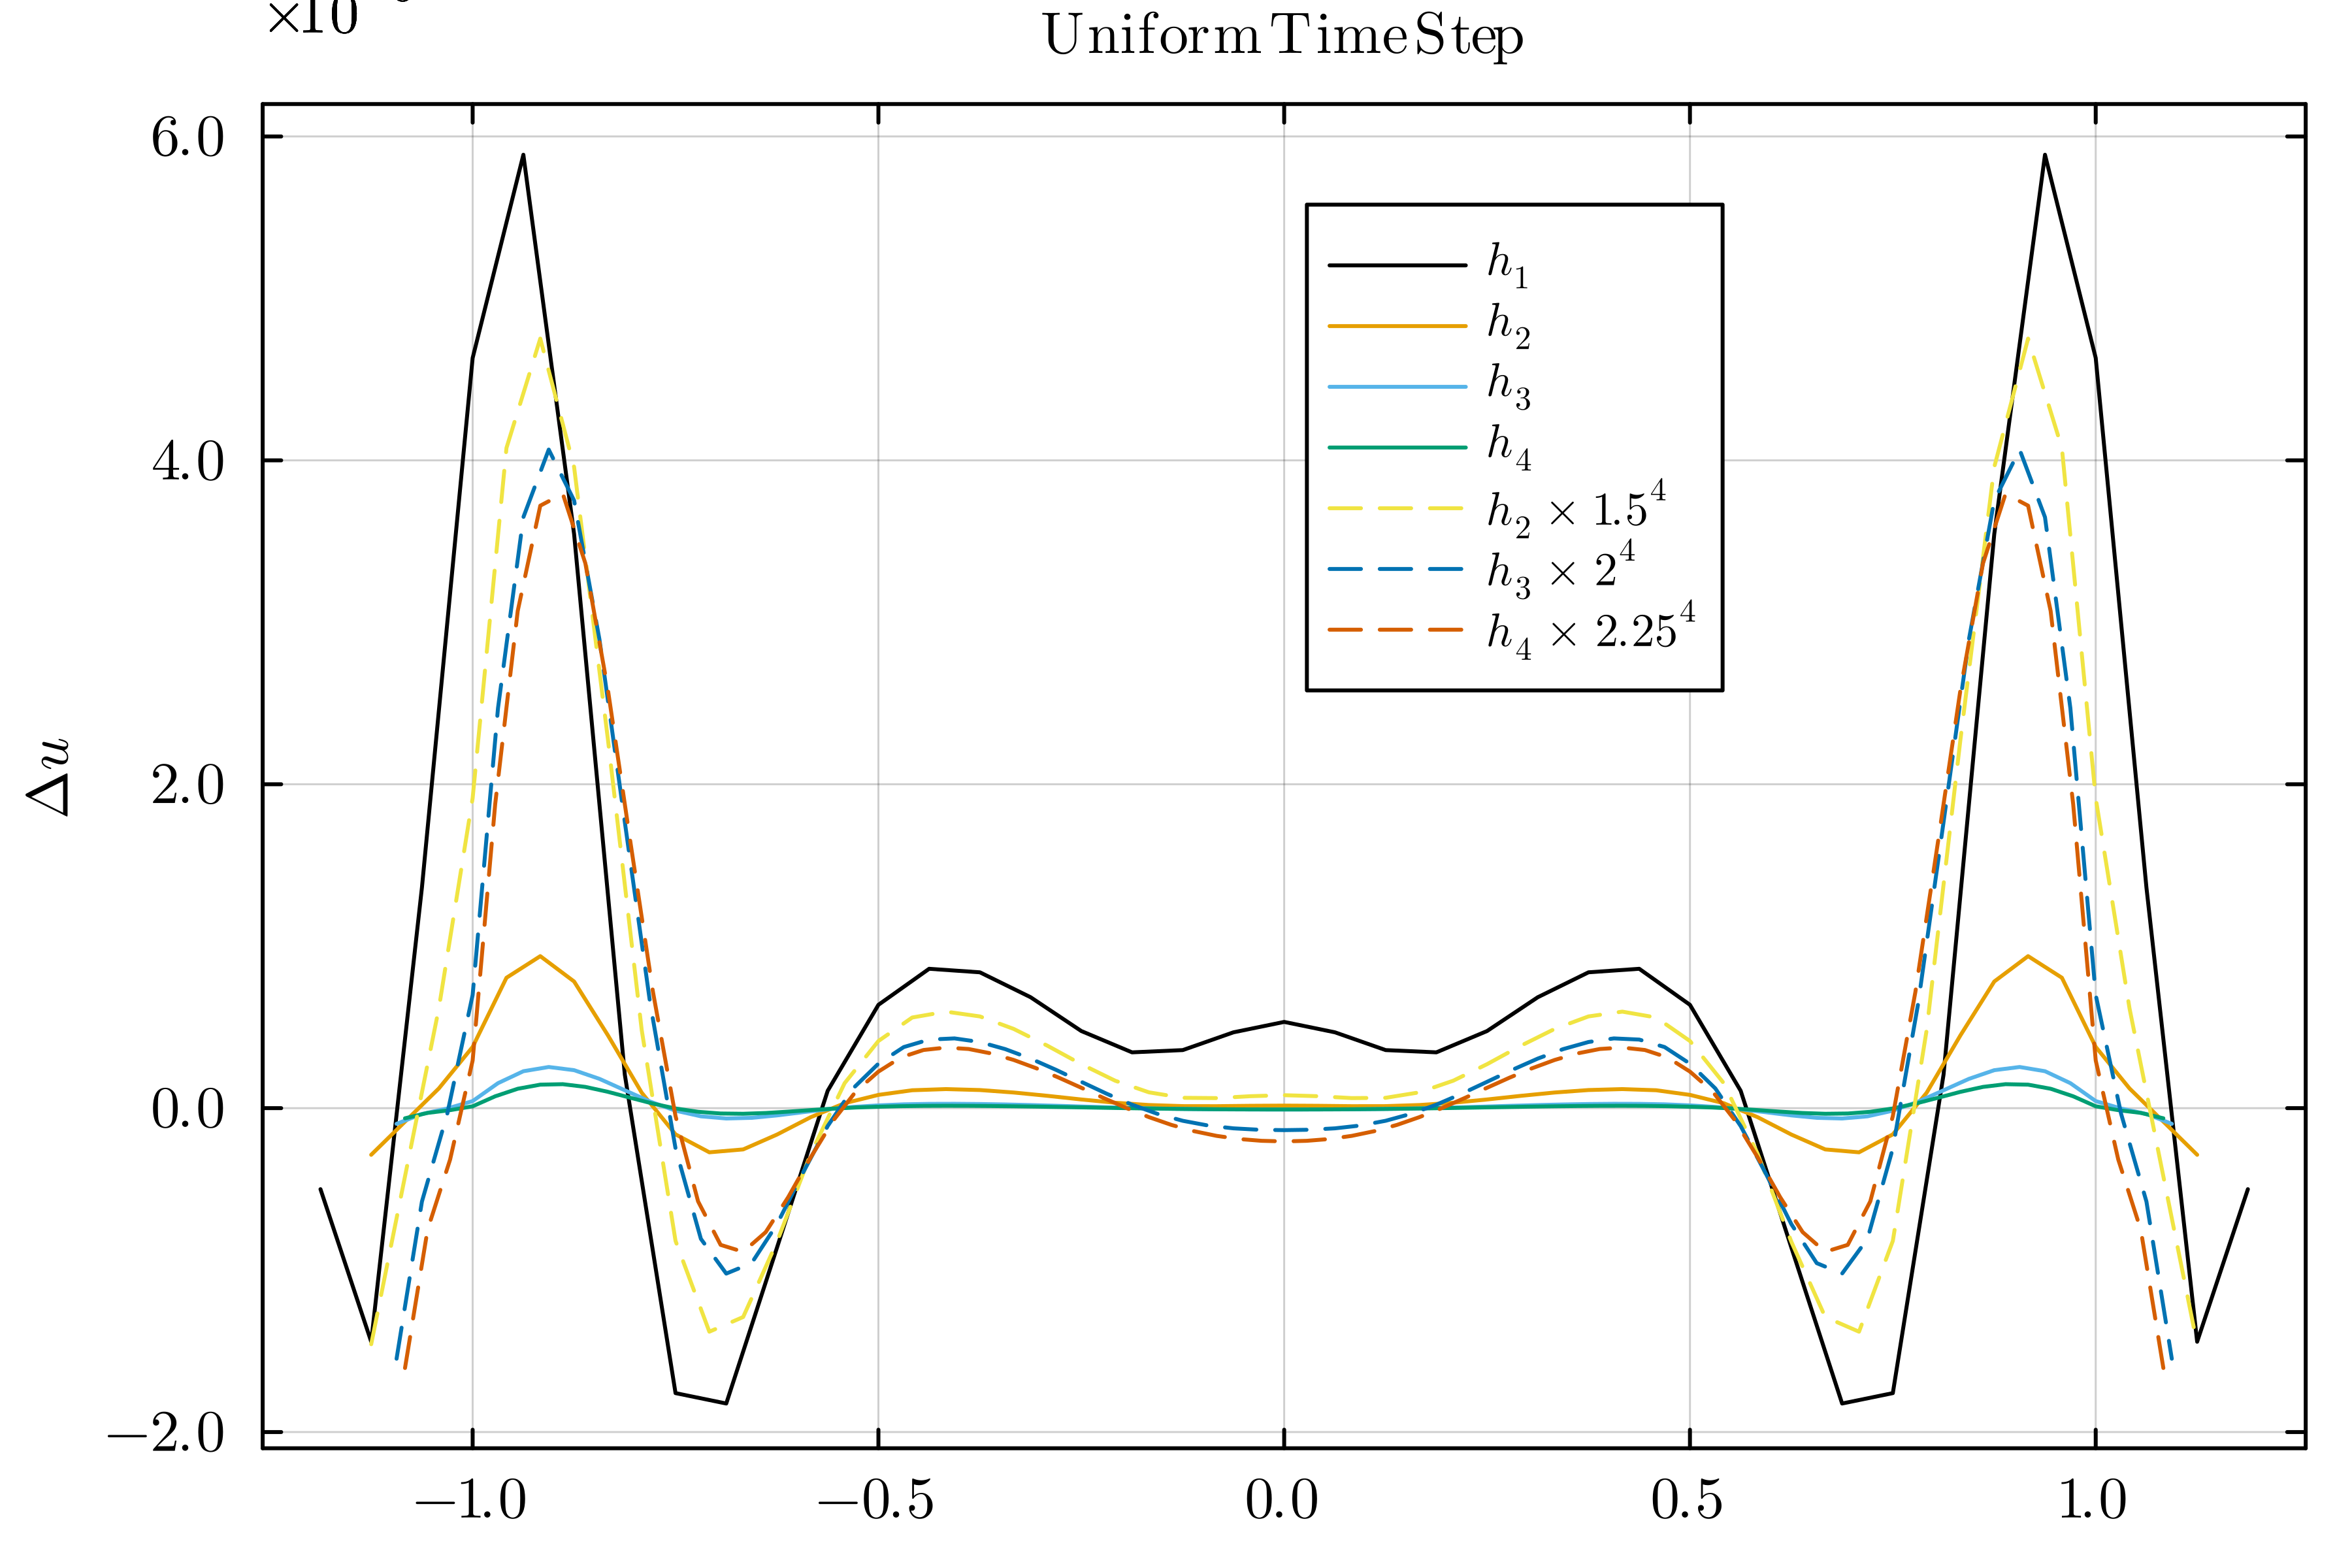

In [10]:
conv_order = 4
conv_bases = [1, 1.5, 2, 2.25]
plts = []
let l=1, t=1.0, dirss,
    dirss = [
        [
            ("gaussian_64_r0000/gaussian_64/", "low"),
            ("gaussian_96_r0000/gaussian_96/", "med"),
            ("gaussian_128_r0000/gaussian_128/", "high"),
            ("gaussian_144_r0000/gaussian_144/", "high"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/3levels-moreres",
                                                  prefix="testsubcyclingmc2-error",
                                                  level=l, ngh=0)
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        plt = plot!(ylim=(-0.0021, 0.0062))
        plt = plot!(legend_position=(0.6, 0.88))
        xs = [-1.0, -0.5, 0.0, 0.5, 1.0]
        xticks!(plt, xs, [L"%$(n)" for n in xs])
        plt = (j==1) ? plot!(title=L"\mathrm{Uniform\, Time\, Step}") : plot!(title=L"\mathrm{Subcycling}", xlabel=L"x")
        
        labs = [L"h_1", L"h_2", L"h_3", L"h_4"]
        for (i, dat) in enumerate(dats)
            lab = (j == 1) ? labs[i] : ""
            plt = plot!(dat[1], dat[2], linewidth=1, framestyle=:box, label=lab, ylabel=L"\Delta u")
            plt = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e3, digits=1))"), topmargin=0.1cm)
            plt = annotate!(-1.25, (0.0062)*1.1, Plots.text(L"\times10^{-3}", 10, :black, :left))
        end
        
        scalelabs = [L"h_2\times 1.5^4", L"h_3\times 2^4", L"h_4\times 2.25^4"]
        for (i, dat) in enumerate(dats[2:4])
            lab = (j == 1) ? scalelabs[i] : ""
            plt = plot!(dat[1], dat[2] * (conv_bases[i+1]^conv_order), linewidth=1, linestyle=:dash, label=lab)
        end
        
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(1,1), dpi=600)
# savefig(plot_grid, "ScalarWave-errors.pdf")
display(plot_grid)

## Old Data

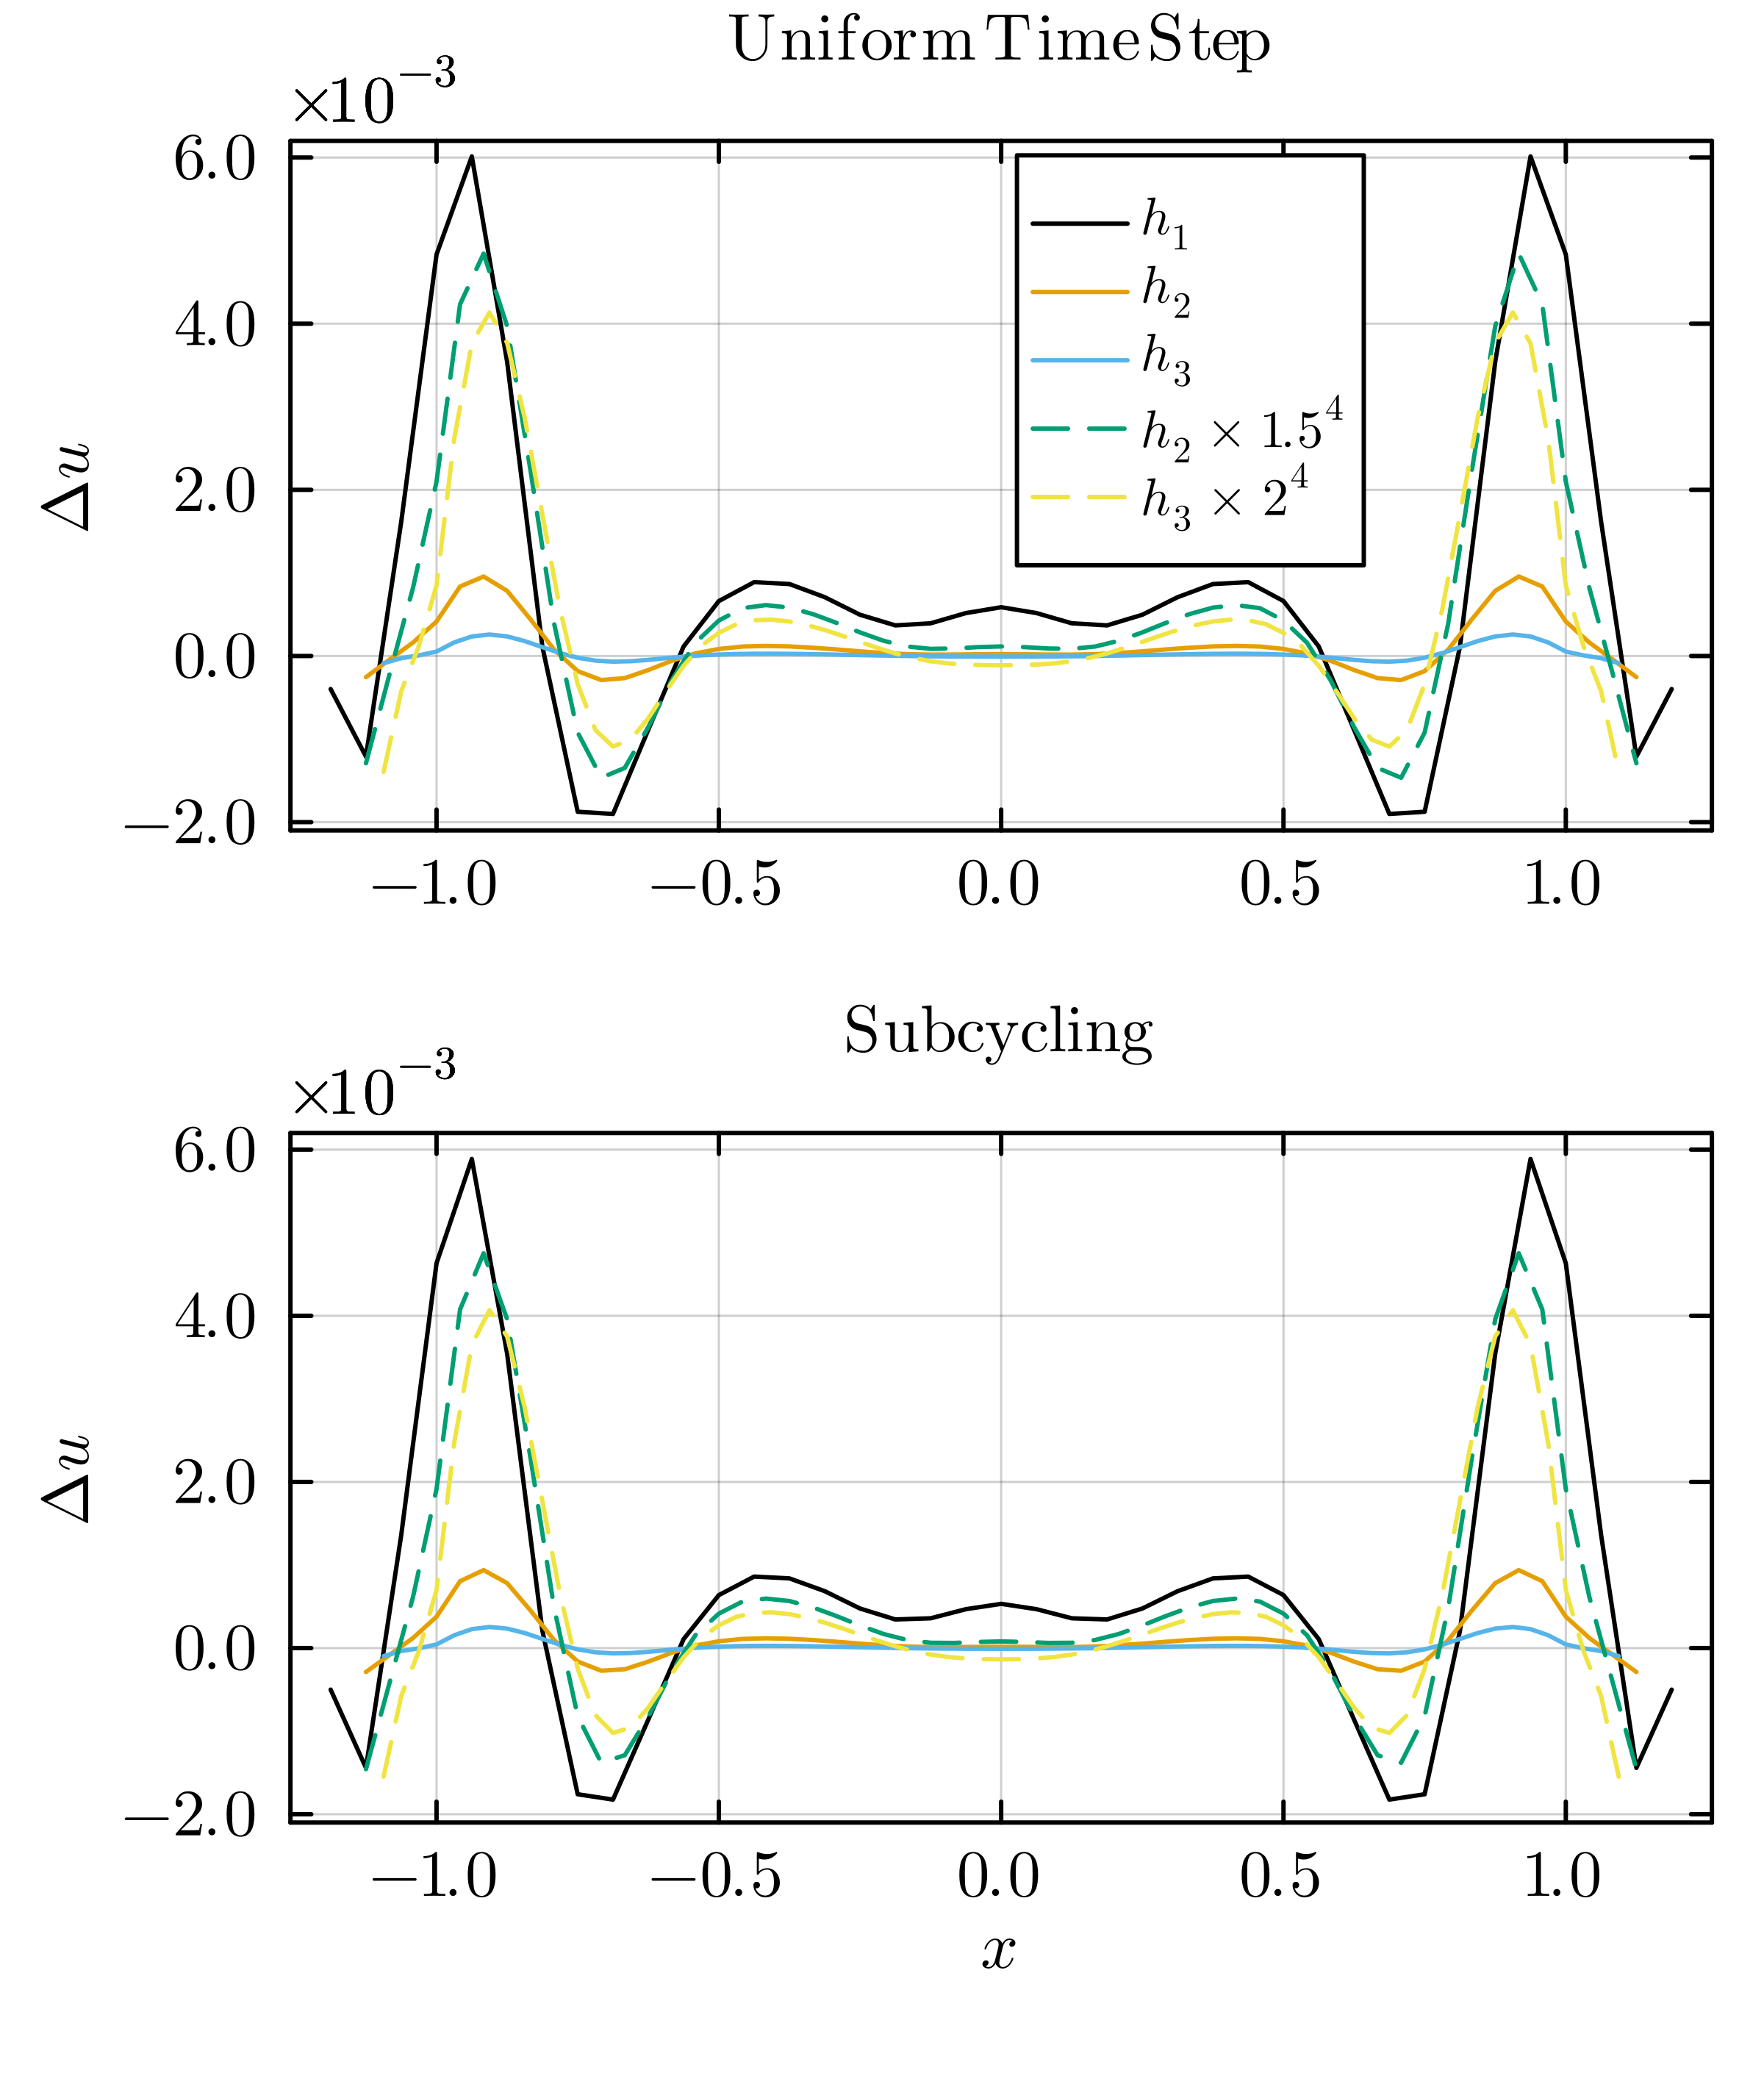

In [8]:
conv_order = 4
conv_bases = [1, 1.5, 2]
plts = []
let l=1, t=1.0, dirss,
    dirss = [
        [
            ("gaussian-noSC_64/output-0000/gaussian-noSC_64/", "low"),
            ("gaussian-noSC_96/output-0000/gaussian-noSC_96/", "med"),
            ("gaussian-noSC_128/output-0000/gaussian-noSC_128/", "high"),
        ],
        [
            ("gaussian_64/output-0000/gaussian_64/", "low"),
            ("gaussian_96/output-0000/gaussian_96/", "med"),
            ("gaussian_128/output-0000/gaussian_128/", "high"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/3levels",
                                                  prefix="testsubcyclingmc2-error",
                                                  level=l, ngh=0)
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        plt = plot!(ylim=(-0.0021, 0.0062))
        plt = plot!(legend_position=(0.6, 0.88))
        xs = [-1.0, -0.5, 0.0, 0.5, 1.0]
        xticks!(plt, xs, [L"%$(n)" for n in xs])
        plt = (j==1) ? plot!(title=L"\mathrm{Uniform\, Time\, Step}") : plot!(title=L"\mathrm{Subcycling}", xlabel=L"x")
        
        labs = [L"h_1", L"h_2", L"h_3"]
        for (i, dat) in enumerate(dats)
            lab = (j == 1) ? labs[i] : ""
            plt = plot!(dat[1], dat[2], linewidth=1, framestyle=:box, label=lab, ylabel=L"\Delta u")
            plt = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e3, digits=1))"), topmargin=0.1cm)
            plt = annotate!(-1.25, (0.0062)*1.1, Plots.text(L"\times10^{-3}", 10, :black, :left))
        end
        
        scalelabs = [L"h_2\times 1.5^4", L"h_3\times 2^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = (j == 1) ? scalelabs[i] : ""
            plt = plot!(dat[1], dat[2] * (conv_bases[i+1]^conv_order), linewidth=1, linestyle=:dash, label=lab)
        end
        
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(2,1), size=(400, 470), dpi=600)
# savefig(plot_grid, "ScalarWave-errors.pdf")
display(plot_grid)